In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
heart_path = "/kaggle/input/hearts/framingham.csv"
heart = pd.read_csv(heart_path)
heart

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Let’s do a quick look at the data from the study. Using Pandas, get the following data : Total Cholesterol, Body Mass Index, Systolic BP, Diastolic BP, Glucose, Heart Rate, Number of Cigarettes Smoked per Day for two groups, those who are at risk for Cardiac Heart Disease in ten years and those that are not. This is indicated by 0 for those who are not at risk and a 1 for those who are in the column labeled “TenYearCHD”.

Plot histograms of the Total Cholesterol, Body Mass Index, Systolic BP, Diastolic BP, Glucose, Heart Rate, Number of Cigarettes Smoked for each risk factor for those who are not at risk and those that are. For a given risk factor, plot the histograms for the not at risk and at risk on the same figure.

In [4]:
risk = heart[(heart["TenYearCHD"] == 1)]
no_risk = heart[(heart["TenYearCHD"] == 0)]

<function matplotlib.pyplot.show(close=None, block=None)>

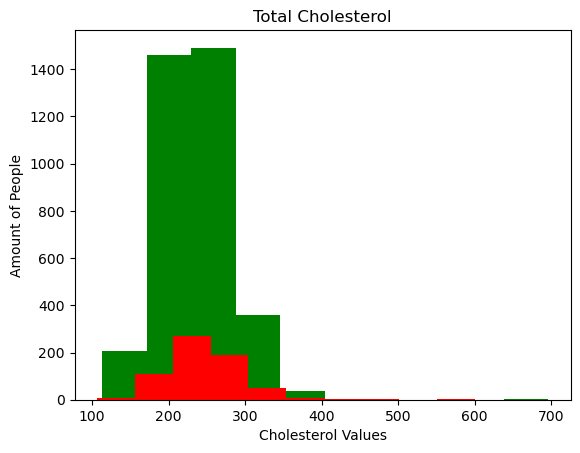

In [5]:
plt.hist(no_risk["totChol"], color='green')
plt.hist(risk["totChol"], color='red')
plt.title("Total Cholesterol")
plt.xlabel("Cholesterol Values")
plt.ylabel("Amount of People")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

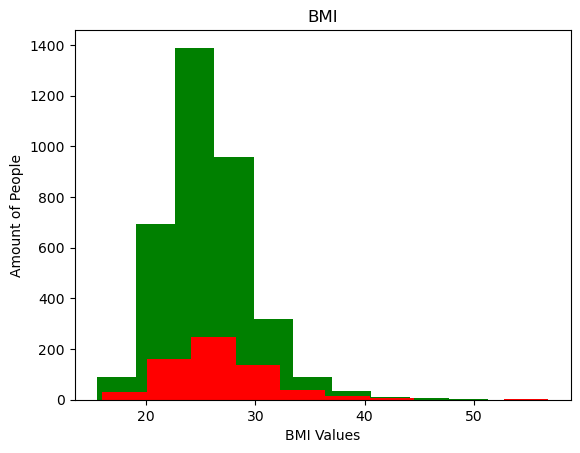

In [6]:
plt.hist(no_risk["BMI"], color='green')
plt.hist(risk["BMI"], color='red')
plt.title("BMI")
plt.xlabel("BMI Values")
plt.ylabel("Amount of People")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

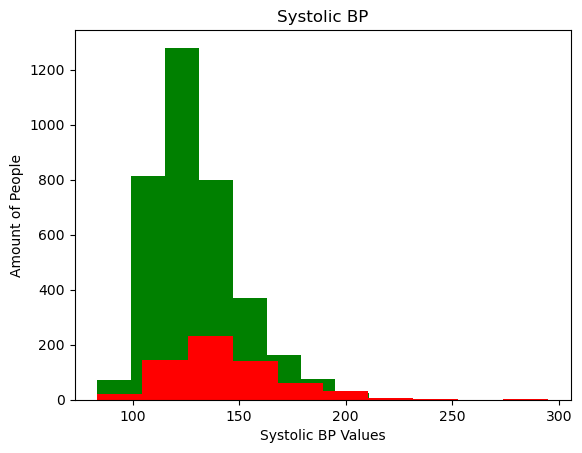

In [7]:
plt.hist(no_risk["sysBP"], color='green')
plt.hist(risk["sysBP"], color='red')
plt.title("Systolic BP")
plt.xlabel("Systolic BP Values")
plt.ylabel("Amount of People")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

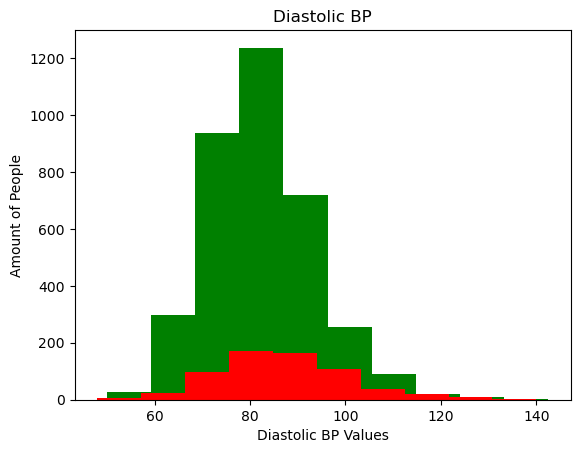

In [8]:
plt.hist(no_risk["diaBP"], color='green')
plt.hist(risk["diaBP"], color='red')
plt.title("Diastolic BP")
plt.xlabel("Diastolic BP Values")
plt.ylabel("Amount of People")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

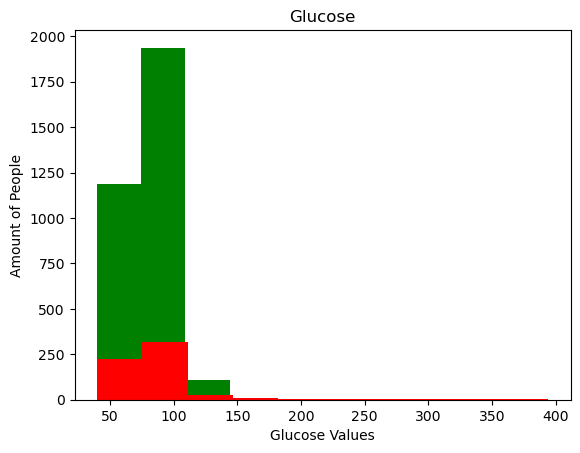

In [9]:
plt.hist(no_risk["glucose"], color='green')
plt.hist(risk["glucose"], color='red')
plt.title("Glucose")
plt.xlabel("Glucose Values")
plt.ylabel("Amount of People")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

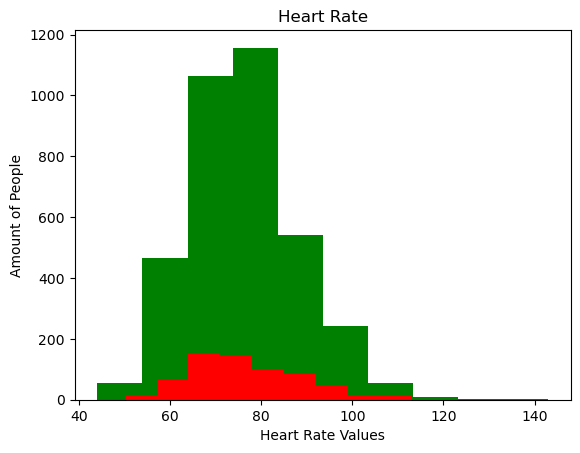

In [10]:
plt.hist(no_risk["heartRate"], color='green')
plt.hist(risk["heartRate"], color='red')
plt.title("Heart Rate")
plt.xlabel("Heart Rate Values")
plt.ylabel("Amount of People")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

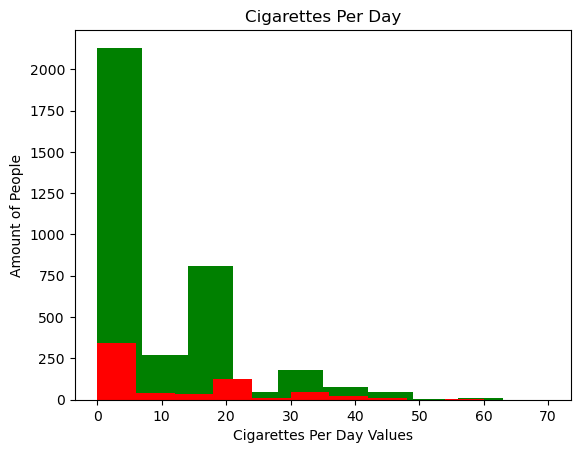

In [11]:
plt.hist(no_risk["cigsPerDay"], color='green')
plt.hist(risk["cigsPerDay"], color='red')
plt.title("Cigarettes Per Day")
plt.xlabel("Cigarettes Per Day Values")
plt.ylabel("Amount of People")
plt.show

Let’s investigate the effects of demographic factors for cardiac disease. First compute, the using all samples, the number of patients who are at risk for Cardiac Heart Disease in ten years and those that are not. This is indicated by 0 for those who are not at risk and a 1 for those who are in the column labeled “TenYearCHD”. Use these numbers to compute the percentage of patients at risk and not at risk.

1. Do the same calculation for all the male patients and for all the female patients.
1. Do the same calculations for all patients <= 45 years old.
1. Do the same calculations for all patients > 45 years old.
1. Do the same calculations for each of the 4 education levels

In [12]:
chd_per = round((len(risk)/len(heart))*100)
nchd_per = round((len(no_risk)/len(heart))*100)

print("CHD:", len(risk),"\t", "NCHD:",len(no_risk))
print("CHD %:",chd_per,"\t", "NCHD %:",nchd_per)

CHD: 644 	 NCHD: 3596
CHD %: 15 	 NCHD %: 85


In [13]:
fem_risk = risk[(risk['male'] == 0)]
fem_no = no_risk[(no_risk['male'] == 0)]
male_risk = risk[(risk['male'] == 1)]
male_no = no_risk[(no_risk['male'] == 1)]

f_r_per = round((len(fem_risk)/(len(fem_risk)+len(fem_no)))*100)
f_n_per = round((len(fem_no)/(len(fem_risk)+len(fem_no)))*100)

print("Female","CHD:", len(fem_risk),"\t", "NCHD:",len(fem_no))
print("Female","CHD %:",f_r_per,"\t", "NCHD %:",f_n_per)
print("\n")

m_r_per = round((len(male_risk)/(len(male_risk)+len(male_no)))*100)
m_n_per = round((len(male_no)/(len(male_risk)+len(male_no)))*100)

print("Male","CHD:", len(male_risk),"\t\t", "NCHD:",len(male_no))
print("Male","CHD %:",m_r_per,"\t\t", "NCHD %:",m_n_per)

Female CHD: 301 	 NCHD: 2119
Female CHD %: 12 	 NCHD %: 88


Male CHD: 343 		 NCHD: 1477
Male CHD %: 19 		 NCHD %: 81


In [14]:
le45_r = risk[(risk['age'] <= 45)]
le45_n = no_risk[(no_risk['age'] <= 45)]
gr45_r = risk[(risk['age'] > 45)]
gr45_n = no_risk[(no_risk['age'] > 45)]

le_r_per = round((len(le45_r)/(len(le45_r)+len(le45_n)))*100)
le_n_per = round((len(le45_n)/(len(le45_r)+len(le45_n)))*100)

print("Less than 45","CHD:", len(le45_r),"\t", "NCHD:",len(le45_n))
print("Less than 45","CHD %:",le_r_per,"\t", "NCHD %:",le_n_per)
print("\n")

gr_r_per = round((len(gr45_r)/(len(gr45_r)+len(gr45_n)))*100)
gr_n_per = round((len(gr45_n)/(len(gr45_r)+len(gr45_n)))*100)

print("Greater or equal to 45","CHD:", len(gr45_r),"\t", "NCHD:",len(gr45_n))
print("Greater or equal to 45","CHD %:",gr_r_per,"\t", "NCHD %:",gr_n_per)

Less than 45 CHD: 106 	 NCHD: 1483
Less than 45 CHD %: 7 	 NCHD %: 93


Greater or equal to 45 CHD: 538 	 NCHD: 2113
Greater or equal to 45 CHD %: 20 	 NCHD %: 80


In [15]:
def num_per(df_r, df_n, column, condition):
    lev_r = df_r[(df_r[column] == condition)]
    lev_n = df_n[(df_n[column] == condition)]
    
    lev_r_per = round((len(lev_r)/(len(lev_r)+len(lev_n)))*100)
    lev_n_per = round((len(lev_n)/(len(lev_r)+len(lev_n)))*100)
    
    print(f"{condition} {column} CHD: {len(lev_r)} \tNCHD: {len(lev_n)}")
    print(f"{condition} {column} CHD %: {lev_r_per} \tNCHD %: {lev_n_per}")
    print('\n')
          
num_per(risk, no_risk, "education", 1)
num_per(risk, no_risk, "education", 2)
num_per(risk, no_risk, "education", 3)
num_per(risk, no_risk, "education", 4)

1 education CHD: 323 	NCHD: 1397
1 education CHD %: 19 	NCHD %: 81


2 education CHD: 147 	NCHD: 1106
2 education CHD %: 12 	NCHD %: 88


3 education CHD: 88 	NCHD: 601
3 education CHD %: 13 	NCHD %: 87


4 education CHD: 70 	NCHD: 403
4 education CHD %: 15 	NCHD %: 85




**Lets suppose we have two sets of data. One containing a set of weights from a group of men, call the set X, and another containing the set of weights from a group of women, call this set Y**

Step 1). Plot a “rough” histogram of the data from each data set to see if the distribution looks like it be normally distributed.

Step 2). If not, then it is best to model the distribution using a histogram. If so, assume that each set X and Y are Normally distributed and can be modelled by two parameters calculated from the set’s data – the mean and Standard Deviation

Text(0, 0.5, 'Amount of People')

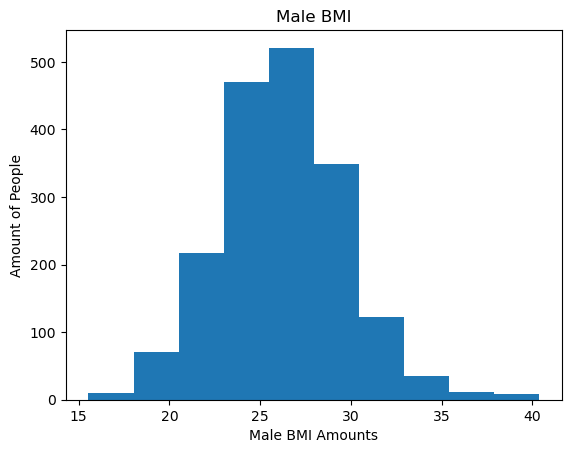

In [16]:
plt.hist(heart["BMI"][heart["male"] == 1])
plt.title("Male BMI")
plt.xlabel("Male BMI Amounts")
plt.ylabel("Amount of People")

Text(0, 0.5, 'Amount of People')

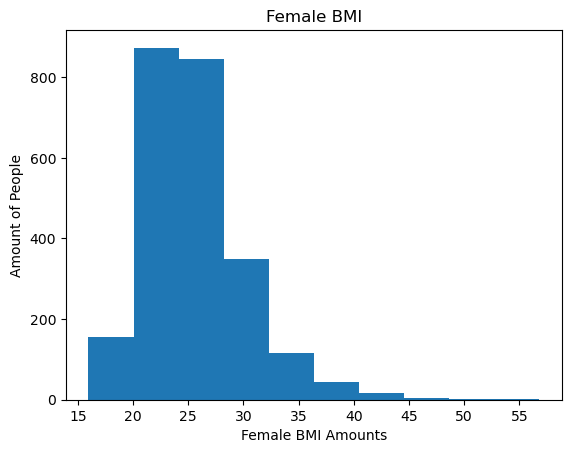

In [17]:
plt.hist(heart["BMI"][heart["male"] == 0])
plt.title("Female BMI")
plt.xlabel("Female BMI Amounts")
plt.ylabel("Amount of People")

Step 3). Compute the mean and Standard Deviation for each set of data.

In [18]:
set_x_mean = ((heart["BMI"][heart["male"]==1]).sum())/len(heart["BMI"][heart["male"]==1])
set_x_standdev = math.sqrt(((((heart["BMI"][heart["male"]==1]) - set_x_mean)**2).sum())/len(heart["BMI"][heart["male"]==1]))
print(set_x_mean, set_x_standdev)

set_y_mean = ((heart["BMI"][heart["male"]==0]).sum())/len(heart["BMI"][heart["male"]==0])
set_y_standdev = math.sqrt(((((heart["BMI"][heart["male"]==0]) - set_x_mean)**2).sum())/len(heart["BMI"][heart["male"]==0]))
print(set_y_mean, set_y_standdev)

26.113395604395603 3.4115507306027415
25.36314049586777 4.521407615321108


Write a python function that evaluates the above Gaussian function. x, mean, and standard devation should be the parameters for the function, i.e. gauss(mean, standard devation, x). The function should return the value of the Gaussian distribution for the input parameters

In [19]:
def gauss(x, m, s):
    value = (math.e**((-1/2)*((x-m)/s)**2))/(((2*math.pi)**(1/2))*s)
    return value

set_x_gauss = gauss((heart["BMI"][heart["male"]==1]), set_x_mean, set_x_standdev)
print(set_x_gauss)

set_y_gauss = gauss((heart["BMI"][heart["male"]==0]), set_y_mean, set_y_standdev)
print(set_y_gauss)

0       0.113310
2       0.113972
8       0.116634
9       0.089337
12      0.116745
          ...   
4231    0.110443
4232    0.079985
4233    0.116835
4234    0.020088
4238    0.115622
Name: BMI, Length: 1820, dtype: float64
1       0.066869
3       0.068504
4       0.077845
5       0.048613
6       0.020331
          ...   
4230    0.075974
4235    0.066910
4236    0.034428
4237    0.060904
4239    0.054325
Name: BMI, Length: 2420, dtype: float64


1). Write a python function that takes as input parameters a list of data, x and y axis labels and a plot title and performs the following operations:

a). Computes the mean and standard deviation for the data set.

b). Creates a subplot with 1 row and 2 columns. Plots a histogram of the data in one subplot and plots a Gaussian distribution with mean and standard deviation computed in part a in the other subplot.

This function will allow you to determine whether or not the assumption of normality is valid.

0.016300548888726157 77.0


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gauss
1183,0,57,1.0,0,0.0,0.0,0,1,0,233.0,184.0,106.0,38.88,66.0,40.0,1,0.003590
3975,1,43,2.0,1,43.0,0.0,0,0,0,240.0,126.0,79.0,21.38,88.0,40.0,0,0.003590
2225,1,38,4.0,0,0.0,0.0,0,0,0,240.0,122.5,80.0,23.97,60.0,43.0,0,0.004436
1419,1,42,3.0,1,20.0,0.0,0,0,0,231.0,123.0,87.0,21.48,75.0,44.0,0,0.004744
2854,1,59,1.0,1,40.0,0.0,0,1,0,188.0,111.0,72.0,21.48,75.0,44.0,0,0.004744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,0,41,2.0,1,5.0,0.0,0,0,0,205.0,105.0,74.0,20.85,87.0,NaN,0,NaN
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0,NaN
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0,NaN
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0,NaN


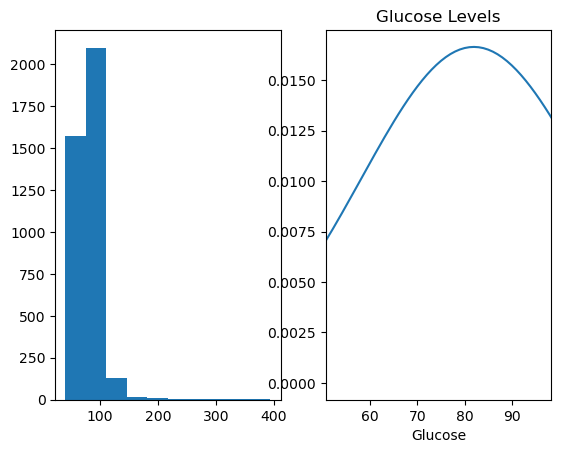

In [20]:
def norm_vs_gauss(data, x_title, plot_title, gauss_x):
    set_mean = (data.sum())/len(data)
    set_standdev = math.sqrt((((data - set_mean)**2).sum())/len(data))

    figs, axs = plt.subplots(1,2)
    axs[0].hist(data)
    axs[1].plot(data,gauss_x, "-")
    axs[1].set_xlim([set_mean-set_standdev, set_mean +set_standdev])
    plt.xlabel(x_title)
    plt.title(plot_title)
    
    
heart.sort_values('glucose', inplace=True)
glu_h = heart["glucose"]

heart["gauss"] = gauss(glu_h, glu_h.mean(), glu_h.std())
norm_vs_gauss(glu_h, "Glucose", "Glucose Levels", heart["gauss"])
print(heart["gauss"][0], heart["glucose"][0])
heart

In [21]:
glu_h.unique()

array([ 40.,  43.,  44.,  45.,  47.,  48.,  50.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 129., 130., 131., 132., 135.,
       136., 137., 140., 142., 143., 144., 145., 147., 148., 150., 155.,
       156., 160., 163., 166., 167., 170., 172., 173., 177., 183., 186.,
       191., 193., 202., 205., 206., 207., 210., 215., 216., 223., 225.,
       235., 244., 248., 250., 254., 255., 256., 260., 268., 270., 274.,
       292., 294., 297., 320., 325., 332., 348., 368., 370., 386., 394.,
        nan])

2). Write a python function that takes as input parameters two lists of data, x and y axis labels and a plot title and performs the following operations:

1. Computes the mean and standard deviation for each data set.
2. Plots the Normal shaped curve for each data set on a single plot.
3. Draw vertical dashed lines on each plot to show where the mean and plus/minus one standard deviation is located.
4. Computes and displays the K factor between the two data sets on plot.

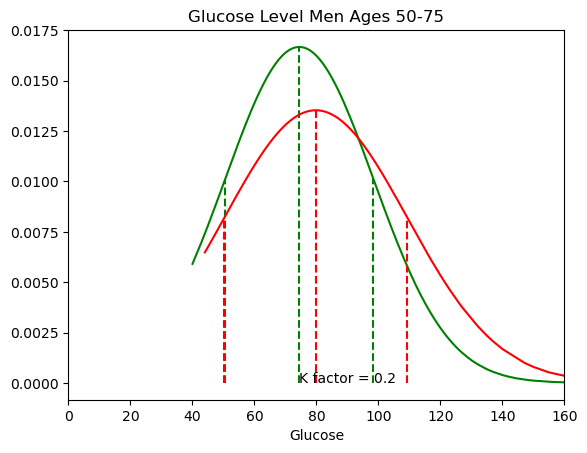

In [22]:
def k_factor(m1, m2, s1, s2):
    value = (abs(m2-m1)) / (((1/2)*(s2**2 + s1**2))**(1/2))
    return value

def gauss_compare(data1, data2, x_label, title, xmin, xmax):
    set1_mean = (data1.sum())/len(data1)
    set1_standdev = math.sqrt((((data1 - set1_mean)**2).sum())/len(data1))
    
    set2_mean = (data2.sum())/len(data2)
    set2_standdev = math.sqrt((((data2 - set2_mean)**2).sum())/len(data2))
    
    gauss_1 = gauss(data1, set1_mean, set1_standdev)
    gauss_2 = gauss(data2, set2_mean, set2_standdev)
    
    plt.plot(data1, gauss_1, color="green")
    plt.plot([set1_mean, set1_mean], [0, gauss(set1_mean, set1_mean, set1_standdev)], color="green", linestyle="--")
    plt.plot([set1_mean-set1_standdev, set1_mean-set1_standdev], [0, gauss(set1_mean-set1_standdev, set1_mean, set1_standdev)], color="green", linestyle="--")
    plt.plot([set1_mean+set1_standdev, set1_mean+set1_standdev], [0, gauss(set1_mean+set1_standdev, set1_mean, set1_standdev)], color="green", linestyle="--")
    
    plt.plot(data2, gauss_2, color="red")
    plt.plot([set2_mean, set2_mean], [0, gauss(set2_mean, set2_mean, set2_standdev)], color="red", linestyle="--")
    plt.plot([set2_mean-set2_standdev, set2_mean-set2_standdev], [0, gauss(set2_mean-set2_standdev, set2_mean, set2_standdev)], color="red", linestyle="--")
    plt.plot([set2_mean+set2_standdev, set2_mean+set2_standdev], [0, gauss(set2_mean+set2_standdev, set2_mean, set2_standdev)], color="red", linestyle="--")
    
    plt.text(set1_mean, 0, f"K factor = {(k_factor(set1_mean, set2_mean, set1_standdev, set2_standdev)).round(2)}")
    
    plt.xlim([xmin, xmax])
    
    plt.xlabel(x_label)
    plt.title(title)
    
gauss_compare(glu_h, glu_h[(heart["male"] == 1) & (heart["age"] >= 50) & (heart["age"] <= 75)], "Glucose", "Glucose Level Men Ages 50-75", 0, 160)